# Republica Moldova

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats

In [27]:
df = pd.read_csv('data/data.csv')

## Import / Export

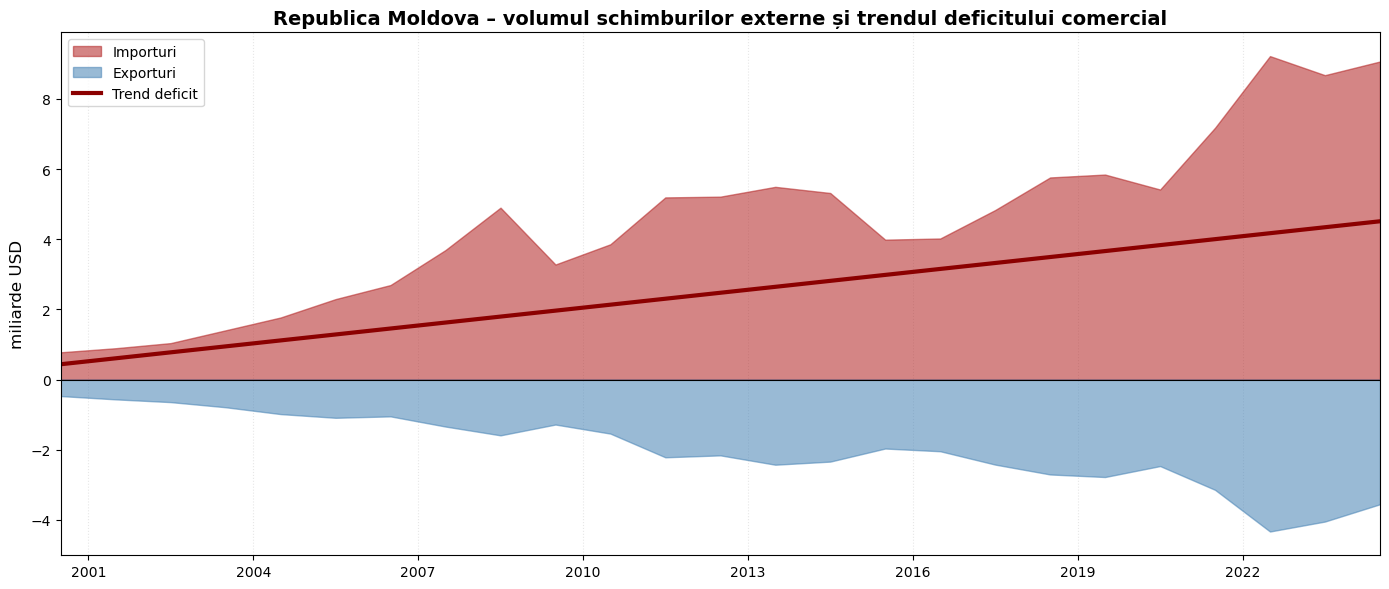

In [28]:
df['Date'] = pd.to_datetime(df['An'].astype(str) + '-07-01')
df['Deficit'] = df['Import'] - df['Export']

fig, ax = plt.subplots(figsize=(14, 6))

ax.fill_between(df.Date,  df.Import/1e6,  alpha=0.55, color='firebrick',
                label='Importuri', zorder=2)
ax.fill_between(df.Date, -df.Export/1e6,  alpha=0.55, color='steelblue',
                label='Exporturi', zorder=2)
ax.axhline(0, color='black', lw=0.8)

df['x_num'] = df['Date'].dt.year + (df['Date'].dt.dayofyear - 1) / 365.25
slope, intercept, r_val, p_val, stderr = stats.linregress(df.x_num, df.Deficit / 1e6)   # mld. USD
trend = slope * df.x_num + intercept

ax.plot(df.Date, trend, color='darkred', lw=3,
        label=f'Trend deficit')

ax.set_ylabel('miliarde USD', fontsize=12)
ax.set_title('Republica Moldova – volumul schimburilor externe și trendul deficitului comercial',
             fontsize=14, weight='bold')
ax.legend(loc='upper left')
ax.xaxis.set_major_locator(mdates.YearLocator(3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xlim(df.Date.iloc[0], df.Date.iloc[-1])
ax.grid(axis='x', ls=':', alpha=0.3)
plt.tight_layout()
plt.show()

## Forecast Deficit 2025-2027

In [29]:
from prophet import Prophet

In [30]:
prop_df = df[['Date','Deficit']].copy()
prop_df.columns = ['ds','y']
prop_df['y'] /= 1e6

In [31]:
m = Prophet(yearly_seasonality=False, interval_width=0.95)
m.fit(prop_df)

17:25:06 - cmdstanpy - INFO - Chain [1] start processing
17:25:06 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
future = m.make_future_dataframe(periods=3, freq='YS')
fc = m.predict(future)

/usr/local/Caskroom/miniforge/base/envs/econ-env/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/Caskroom/miniforge/base/envs/econ-env/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



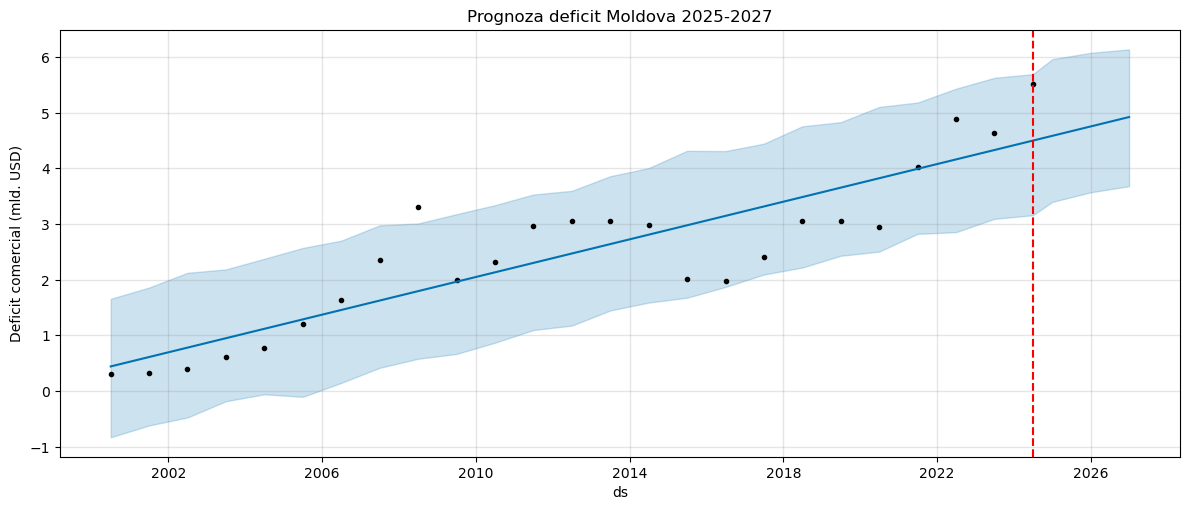

,ds,yhat,yhat_lower,yhat_upper
25,2025-01-01,4.584206,3.397388,5.960279
26,2026-01-01,4.753035,3.570661,6.074964
27,2027-01-01,4.921865,3.679694,6.136343


In [33]:
fig = m.plot(fc, figsize=(12,5))
plt.axvline(x=pd.Timestamp('2024-07-01'), color='red', ls='--')
plt.ylabel('Deficit comercial (mld. USD)')
plt.title('Prognoza deficit Moldova 2025-2027')
plt.show()

display(fc[['ds','yhat','yhat_lower','yhat_upper']].tail(3))

## Sankey 2023

In [34]:
import plotly.graph_objects as go

In [35]:
an = 2023
row = df.set_index('An').loc[an]

In [36]:
export_p = [row.UE_Export_pct, row.CSI_Export_pct, row.Altele_Export_pct]
import_p = [row.UE_Import_pct, row.CSI_Import_pct, row.Altele_Import_pct]

In [37]:
ex_val = [round(row.Export*p/100) for p in export_p]
im_val = [round(row.Import*p/100) for p in import_p]

In [38]:
labels = ['UE', 'CSI', 'Rest', 'Export MD', 'Import MD']
source = [0,1,2, 0,1,2] 
target = [3,3,3, 4,4,4]
value  = ex_val + im_val

In [39]:
fig = go.Figure(go.Sankey(node=dict(label=labels, pad=15, thickness=20),
                          link=dict(source=source, target=target,
                                   value=value,
                                   color=['rgba(70,130,180,0.6)']*3 + 
                                         ['rgba(178,34,34,0.6)']*3)))
fig.update_layout(title=f'Republica Moldova – fluxuri comerciale {an} (mii USD)',
                  font_size=13)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

: 